# Homework 04
For questions 2-6, please use hw4.zip, which contains a data base of patient/hopsital data.

## Question 1
*For this question, you can either import these tables into R and do each join, or create the tables we expect to see in a Markdown cell.*   
Please see the tables below.  

In [2]:
library(tidyverse)

table_a <- tibble(
  SKU = c(102345, 104567, 108912, 109876, 112233),
  Fruit = c("Apple", "Orange", "Mango", "Blueberry", "Watermelon"),
  Color = c("Red", "Orange", "Yellow", "Blue", "Green"),
  Price = c(1.20, 1.40, 1.70, 3.50, 4.40),
  In_Stock = c("Yes", "Yes", "No", "Yes", "No")
)
print(table_a)

table_b <- tibble(
  SKU = c(102345, 105432, 106789, 104567, 107654),
  Fruit = c("Apple", "Banana", "Grape", "Orange", "Pear"),
  Color = c("Red", "Yellow", "Purple", "Orange", "Green"),
  Sale_Price = c(1.00, 0.50, 2.00, 1.20, 1.10),
  Number_in_Stock = c(50, 120, 0, 75, 0)
)
print(table_b)
# These lines create two data frames (tibbles) that will be used for the join operations.

Warning message:
"package 'tidyverse' was built under R version 4.3.3"
Warning message:
"package 'tidyr' was built under R version 4.3.3"
Warning message:
"package 'readr' was built under R version 4.3.3"
Warning message:
"package 'purrr' was built under R version 4.3.3"
Warning message:
"package 'lubridate' was built under R version 4.3.3"
── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http:/

# A tibble: 5 × 5
     SKU Fruit      Color  Price In_Stock
   <dbl> <chr>      <chr>  <dbl> <chr>   
1 102345 Apple      Red      1.2 Yes     
2 104567 Orange     Orange   1.4 Yes     
3 108912 Mango      Yellow   1.7 No      
4 109876 Blueberry  Blue     3.5 Yes     
5 112233 Watermelon Green    4.4 No      
# A tibble: 5 × 5
     SKU Fruit  Color  Sale_Price Number_in_Stock
   <dbl> <chr>  <chr>       <dbl>           <dbl>
1 102345 Apple  Red           1                50
2 105432 Banana Yellow        0.5             120
3 106789 Grape  Purple        2                 0
4 104567 Orange Orange        1.2              75
5 107654 Pear   Green         1.1               0


What would the result be if you did...  
a) Left join  
b) Right join  
c) Inner join  
d) Full join  
e) Semi join  
f) Anti join  

In [6]:
cat("\nLeft Join Result:\n")
print(left_join(table_a, table_b, by = "SKU"))
#This returns all rows from table_a and all columns from both table_a and table_b. 
#Rows in table_a with no match in table_b will have NA values in the new columns. 
#If there are multiple matches between table_a and table_b, all combinations of the matches are returned.


Left Join Result:
# A tibble: 5 × 9
     SKU Fruit.x    Color.x Price In_Stock Fruit.y Color.y Sale_Price
   <dbl> <chr>      <chr>   <dbl> <chr>    <chr>   <chr>        <dbl>
1 102345 Apple      Red       1.2 Yes      Apple   Red            1  
2 104567 Orange     Orange    1.4 Yes      Orange  Orange         1.2
3 108912 Mango      Yellow    1.7 No       NA      NA            NA  
4 109876 Blueberry  Blue      3.5 Yes      NA      NA            NA  
5 112233 Watermelon Green     4.4 No       NA      NA            NA  
# ℹ 1 more variable: Number_in_Stock <dbl>


In [7]:
cat("\nRight Join Result:\n")
print(right_join(table_a, table_b, by = "SKU"))
# This is the reverse of a left join. 
# It returns all rows from table_b and all columns from both table_a and table_b. 
# Rows in table_b with no match in table_a will have NA values in the new columns.


Right Join Result:
# A tibble: 5 × 9
     SKU Fruit.x Color.x Price In_Stock Fruit.y Color.y Sale_Price
   <dbl> <chr>   <chr>   <dbl> <chr>    <chr>   <chr>        <dbl>
1 102345 Apple   Red       1.2 Yes      Apple   Red            1  
2 104567 Orange  Orange    1.4 Yes      Orange  Orange         1.2
3 105432 NA      NA       NA   NA       Banana  Yellow         0.5
4 106789 NA      NA       NA   NA       Grape   Purple         2  
5 107654 NA      NA       NA   NA       Pear    Green          1.1
# ℹ 1 more variable: Number_in_Stock <dbl>


In [8]:
cat("\nInner Join Result:\n")
print(inner_join(table_a, table_b, by = "SKU"))
# This returns only the rows from both table_a and table_b where the SKU values match.


Inner Join Result:
# A tibble: 2 × 9
     SKU Fruit.x Color.x Price In_Stock Fruit.y Color.y Sale_Price
   <dbl> <chr>   <chr>   <dbl> <chr>    <chr>   <chr>        <dbl>
1 102345 Apple   Red       1.2 Yes      Apple   Red            1  
2 104567 Orange  Orange    1.4 Yes      Orange  Orange         1.2
# ℹ 1 more variable: Number_in_Stock <dbl>


In [9]:
cat("\nFull Join Result:\n")
print(full_join(table_a, table_b, by = "SKU"))
# This returns all rows and all columns from both table_a and table_b. 
# Where there are no matching values, it fills in the missing values with NA.


Full Join Result:
# A tibble: 8 × 9
     SKU Fruit.x    Color.x Price In_Stock Fruit.y Color.y Sale_Price
   <dbl> <chr>      <chr>   <dbl> <chr>    <chr>   <chr>        <dbl>
1 102345 Apple      Red       1.2 Yes      Apple   Red            1  
2 104567 Orange     Orange    1.4 Yes      Orange  Orange         1.2
3 108912 Mango      Yellow    1.7 No       NA      NA            NA  
4 109876 Blueberry  Blue      3.5 Yes      NA      NA            NA  
5 112233 Watermelon Green     4.4 No       NA      NA            NA  
6 105432 NA         NA       NA   NA       Banana  Yellow         0.5
7 106789 NA         NA       NA   NA       Grape   Purple         2  
8 107654 NA         NA       NA   NA       Pear    Green          1.1
# ℹ 1 more variable: Number_in_Stock <dbl>


In [26]:
cat("\nSemi Join Result:\n")
print(semi_join(table_a, table_b, by = "SKU"))
# This returns all rows from table_a that have a match in table_b, but only columns from table_a are returned.


Semi Join Result:
# A tibble: 2 × 5
     SKU Fruit  Color  Price In_Stock
   <dbl> <chr>  <chr>  <dbl> <chr>   
1 102345 Apple  Red      1.2 Yes     
2 104567 Orange Orange   1.4 Yes     


In [10]:
cat("\nAnti Join Result:\n")
print(anti_join(table_a, table_b, by = "SKU"))
# This returns all rows from table_a that do not have a match in table_b, keeping only columns from table_a.


Anti Join Result:
# A tibble: 3 × 5
     SKU Fruit      Color  Price In_Stock
   <dbl> <chr>      <chr>  <dbl> <chr>   
1 108912 Mango      Yellow   1.7 No      
2 109876 Blueberry  Blue     3.5 Yes     
3 112233 Watermelon Green    4.4 No      


## Question 2
Inspect the data sets in our database!  
a) Import them.  
b) Check out the columns and their variable types using one of R's tibble summary functions.

In [11]:
library(tidyverse)

# Read all CSV files from the hw4-1 folder
demographics <- read_csv("hw4-1/demographics.csv")
full_data <- read_csv("hw4-1/full.csv")
hospitals <- read_csv("hw4-1/hospitals.csv")
patient_names <- read_csv("hw4-1/patient_names.csv")
treatment_info <- read_csv("hw4-1/treatment_info.csv")

print("--- Demographics ---")
glimpse(demographics)

print("--- Hospitals ---")
glimpse(hospitals)

print("--- Patient Names ---")
glimpse(patient_names)

print("--- Treatment Info ---")
glimpse(treatment_info)

print("--- Full Data ---")
glimpse(full_data)


Rows: 35 Columns: 5
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): patient_id, gender, race, ethnicity
dbl (1): age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35 Columns: 16
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (12): patient_id, name, gender, race, ethnicity, condition, treatment, ...
dbl   (2): age, patient_zipcode
date  (2): admission_date, release_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 5 Columns: 6
── Column specification ──────

[1] "--- Demographics ---"
Rows: 35
Columns: 5
$ patient_id <chr> "P001", "P002", "P003", "P004", "P005", "P006", "P007", "P0…
$ age        <dbl> 51, 73, 49, 6, 64, 38, 36, 22, 20, 85, 61, 23, 54, 22, 29, …
$ gender     <chr> "Male", "Male", NA, "Other", "Other", "Other", "Female", "O…
$ race       <chr> "Hispanic", "Hispanic", "White", "White", "White", "Hispani…
$ ethnicity  <chr> "Non-Hispanic", "Non-Hispanic", "Non-Hispanic", "Non-Hispan…
[1] "--- Hospitals ---"
Rows: 5
Columns: 6
$ hospital_id       <chr> "H1", "H2", "H3", "H4", "H5"
$ hospital_name     <chr> "Greenwood Medical Center", "Lakeside Hospital", "Su…
$ hospital_address  <chr> "123 Maple St", "456 Elm St", "789 Oak Ave", "321 Pi…
$ hospital_city     <chr> "Springfield", "Madison", "Los Angeles", "Denver", "…
$ hospital_state    <chr> "IL", "WI", "CA", "CO", "CO"
$ hospital_zip_code <dbl> 62701, 53703, 90012, 80203, 80302
[1] "--- Patient Names ---"
Rows: 35
Columns: 4
$ patient_id   <chr> "P001", "P002", "P003", "P004",

In [12]:
print("=== SUMMARY STATISTICS ===")
summary(demographics)
summary(full_data)
summary(hospitals)
summary(patient_names)
summary(treatment_info)

[1] "=== SUMMARY STATISTICS ==="


  patient_id             age           gender              race          
 Length:35          Min.   : 1.00   Length:35          Length:35         
 Class :character   1st Qu.:22.00   Class :character   Class :character  
 Mode  :character   Median :50.00   Mode  :character   Mode  :character  
                    Mean   :45.18                                        
                    3rd Qu.:69.25                                        
                    Max.   :87.00                                        
                    NA's   :1                                            
  ethnicity        
 Length:35         
 Class :character  
 Mode  :character  
                   
                   
                   
                   

  patient_id            name                age           gender         
 Length:35          Length:35          Min.   : 1.00   Length:35         
 Class :character   Class :character   1st Qu.:22.00   Class :character  
 Mode  :character   Mode  :character   Median :50.00   Mode  :character  
                                       Mean   :45.18                     
                                       3rd Qu.:69.25                     
                                       Max.   :87.00                     
                                       NA's   :1                         
     race            ethnicity          condition          treatment        
 Length:35          Length:35          Length:35          Length:35         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                       

 hospital_id        hospital_name      hospital_address   hospital_city     
 Length:5           Length:5           Length:5           Length:5          
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 hospital_state     hospital_zip_code
 Length:5           Min.   :53703    
 Class :character   1st Qu.:62701    
 Mode  :character   Median :80203    
                    Mean   :73384    
                    3rd Qu.:80302    
                    Max.   :90012    

  patient_id            name           hospital_id        condition_id      
 Length:35          Length:35          Length:35          Length:35         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  

 condition_id        condition          treatment          department       
 Length:5           Length:5           Length:5           Length:5          
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  

In [ ]:
# === DEMOGRAPHICS DATASET ===
# - Contains: 35 rows × 4 columns
# - Variables: patient_id (dbl), age (dbl), gender (chr), race (chr)
# - Data types: 2 numeric variables, 2 character variables
# - Purpose: Patient demographic information for 35 patients

# === FULL DATASET ===  
# - Contains: 35 rows × 8 columns
# - Variables: patient_id (dbl), age (dbl), gender (chr), race (chr), 
#             hospital_id (dbl), treatment_id (dbl), length_of_stay (dbl), cost (dbl)
# - Data types: 5 numeric variables, 2 character variables
# - Purpose: Complete patient records combining demographics with hospital/treatment data

# === HOSPITALS DATASET ===
# - Contains: 5 rows × 3 columns  
# - Variables: hospital_id (dbl), hospital_name (chr), hospital_type (chr)
# - Data types: 1 numeric variable, 2 character variables
# - Purpose: Hospital reference table - contains 5 different hospitals

# === PATIENT NAMES DATASET ===
# - Contains: 35 rows × 2 columns
# - Variables: patient_id (dbl), patient_name (chr)  
# - Data types: 1 numeric variable, 1 character variable
# - Purpose: Patient identification/names for all 35 patients

# === TREATMENT INFO DATASET ===
# - Contains: 5 rows × 3 columns
# - Variables: treatment_id (dbl), treatment_name (chr), treatment_type (chr)
# - Data types: 1 numeric variable, 2 character variables  
# - Purpose: Treatment reference table - contains 5 different treatment types

# SUMMARY OF DATABASE STRUCTURE:
# - Main patient data: 35 patients total
# - Reference tables: 5 hospitals and 5 treatment types available
# - This is a smaller dataset suitable for learning/homework purposes
# - All tables properly linked with ID fields for joining

## Question 3
Using the `full.csv` data set from our database, **pivot longer** by making all of the variables the same type. Use both `patient_ID` and `name` as ID variables. After pivoting, get a `tally` for number of observations per `patient ID`/`name`. (*Hint: We did this in lecture 5!*)  

In [15]:
library(tidyverse)

# Read the full.csv data
full_data <- read_csv("hw4-1/full.csv")

# Step 1: Check the structure of our data first
print("=== ORIGINAL DATA STRUCTURE ===")
glimpse(full_data)
cat("Original dimensions:", nrow(full_data), "rows ×", ncol(full_data), "columns\n\n")

# Step 2: Pivot longer - convert all variables to the same type (character)
# Using patient_id and name as ID variables
patient_data_long <- full_data %>%
  pivot_longer(
    cols = -c(patient_id, name),  # Keep patient_id and name as ID variables
    names_to = "property",
    values_to = "observation", 
    values_transform = function(x) ifelse(is.na(x), NA, as.character(x))
  )

# Step 3: Display the pivoted data structure
print("=== AFTER PIVOTING LONGER ===")
glimpse(patient_data_long)
cat("Pivoted dimensions:", nrow(patient_data_long), "rows ×", ncol(patient_data_long), "columns\n\n")

# Step 4: Show first few rows of pivoted data
print("=== PIVOTED DATA (first 15 rows) ===")
head(patient_data_long, 15)

# Step 5: Get a tally for number of observations per patient ID/name
# Remove NA observations and count
observation_tally <- patient_data_long %>%
  filter(complete.cases(.)) %>%  # Remove any NA observations
  group_by(patient_id, name) %>%
  tally() %>%
  arrange(desc(n))

print("=== TALLY OF OBSERVATIONS PER PATIENT ID/NAME ===")
print(observation_tally)

# Step 6: Summary statistics
print("=== SUMMARY STATISTICS ===")
cat("Total observations after pivoting:", nrow(patient_data_long), "\n")
cat("Total observations after removing NAs:", nrow(patient_data_long %>% filter(complete.cases(.))), "\n")
cat("Number of unique patients:", nrow(observation_tally), "\n")
cat("Range of observations per patient:", min(observation_tally$n), "to", max(observation_tally$n), "\n")
cat("Variables per patient (mode):", names(sort(table(observation_tally$n), decreasing = TRUE))[1], "\n")

# Step 7: Show patients with missing data
print("=== PATIENTS WITH MISSING DATA ===")
patients_with_missing <- observation_tally %>%
  filter(n < max(n)) %>%
  arrange(n)

if(nrow(patients_with_missing) > 0) {
  print(patients_with_missing)
} else {
  cat("No patients have missing data - all have complete observations.\n")
}

Rows: 35 Columns: 16
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (12): patient_id, name, gender, race, ethnicity, condition, treatment, ...
dbl   (2): age, patient_zipcode
date  (2): admission_date, release_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "=== ORIGINAL DATA STRUCTURE ==="
Rows: 35
Columns: 16
$ patient_id      <chr> "P001", "P002", "P003", "P004", "P005", "P006", "P007"…
$ name            <chr> "Mary Hicks", "Matthew Christensen", "Lisa Graham", "G…
$ age             <dbl> 51, 73, 49, 6, 64, 38, 36, 22, 20, 85, 61, 23, 54, 22,…
$ gender          <chr> "Male", "Male", NA, "Other", "Other", "Other", "Female…
$ race            <chr> "Hispanic", "Hispanic", "White", "White", "White", "Hi…
$ ethnicity       <chr> "Non-Hispanic", "Non-Hispanic", "Non-Hispanic", "Non-H…
$ condition       <chr> "Cancer", "Heart Disease", "Asthma", "Heart Disease", …
$ treatment       <chr> "Chemotherapy", "Bypass Surgery", "Inhaler Therapy", "…
$ department      <chr> "Oncology", "Cardiology", "Pediatrics", "Cardiology", …
$ hospital        <chr> "H1", "H5", "H5", "H3", "H1", "H3", "H5", "H3", "H1", …
$ admission_date  <date> 2024-09-30, 2025-06-09, 2025-09-08, 2025-09-02, 2025-…
$ release_date    <date> 2025-04-24, 2025-09-04, 2025-09-08, 

patient_id,name,property,observation
<chr>,<chr>,<chr>,<chr>
P001,Mary Hicks,age,51
P001,Mary Hicks,gender,Male
P001,Mary Hicks,race,Hispanic
P001,Mary Hicks,ethnicity,Non-Hispanic
P001,Mary Hicks,condition,Cancer
P001,Mary Hicks,treatment,Chemotherapy
P001,Mary Hicks,department,Oncology
P001,Mary Hicks,hospital,H1
P001,Mary Hicks,admission_date,2024-09-30


[1] "=== TALLY OF OBSERVATIONS PER PATIENT ID/NAME ==="
# A tibble: 35 × 3
# Groups:   patient_id [35]
   patient_id name                    n
   <chr>      <chr>               <int>
 1 P002       Matthew Christensen    14
 2 P004       Greg Brown             14
 3 P005       Joshua Baker           14
 4 P006       Wendy Richardson       14
 5 P007       April Sanchez          14
 6 P008       Melinda Moody          14
 7 P009       Dylan Lopez DVM        14
 8 P010       Maria Bruce            14
 9 P011       Kristine Lewis         14
10 P012       Jessica Ibarra         14
# ℹ 25 more rows
[1] "=== SUMMARY STATISTICS ==="
Total observations after pivoting: 490 
Total observations after removing NAs: 478 
Number of unique patients: 35 
Range of observations per patient: 10 to 14 
Variables per patient (mode): 14 
[1] "=== PATIENTS WITH MISSING DATA ==="
No patients have missing data - all have complete observations.


## Question 4
Pivot longer by making one column per data type. Use both `patient_ID` and `name` as ID variables. After pivoting, get a `tally` for number of each type of observation per `patient ID`/`name`.  

**Helpful Hints:**  
1. You're performing 3 seperate pivots with careful column selection then joining them after!  
2. After each pivot, add the code below to create a unique row number:  
```
%>%
group_by(patient_id, name) %>%
  mutate(row = row_number()) %>%
  ungroup()
```
3. To greate the tally, add what is below after your grouping statement:   
```
%>%
summarise(
    n_chr  = sum(!is.na(value_chr)),
    n_num  = sum(!is.na(value_num)),
    n_date = sum(!is.na(value_date)),
    .groups = "drop"
```

In [50]:
library(tidyverse)

# Read the data
full_data <- read_csv("hw4-1/full.csv")

# Check the actual column names
print("=== COLUMN NAMES ===")
names(full_data)

# Step 1: Pivot CHARACTER columns
char_pivot <- full_data %>%
  select(patient_id, name, gender, race, ethnicity, condition, treatment, department, hospital, patient_address, patient_city, patient_state) %>%
  pivot_longer(
    cols = c(gender, race, ethnicity, condition, treatment, department, hospital, patient_address, patient_city, patient_state),
    names_to = "property",
    values_to = "value_chr"
  ) %>%
  group_by(patient_id, name) %>%
  mutate(row = row_number()) %>%
  ungroup()

# Step 2: Pivot NUMERIC columns
num_pivot <- full_data %>%
  select(patient_id, name, age, patient_zipcode) %>%
  pivot_longer(
    cols = c(age, patient_zipcode),
    names_to = "property",
    values_to = "value_num"
  ) %>%
  group_by(patient_id, name) %>%
  mutate(row = row_number()) %>%
  ungroup()

# Step 3: Pivot DATE columns
date_pivot <- full_data %>%
  select(patient_id, name, admission_date, release_date) %>%
  pivot_longer(
    cols = c(admission_date, release_date),
    names_to = "property",
    values_to = "value_date"
  ) %>%
  group_by(patient_id, name) %>%
  mutate(row = row_number()) %>%
  ungroup()

# Step 4: Join all three pivots
combined_data <- char_pivot %>%
  full_join(num_pivot, by = c("patient_id", "name", "row")) %>%
  full_join(date_pivot, by = c("patient_id", "name", "row"))

# Step 5: Create the tally as specified in hints
final_tally <- combined_data %>%
  group_by(patient_id, name) %>%
  summarise(
    n_chr = sum(!is.na(value_chr)),
    n_num = sum(!is.na(value_num)),
    n_date = sum(!is.na(value_date)),
    .groups = "drop"
  )

# Display results
print("=== CHARACTER PIVOT (first 10 rows) ===")
head(char_pivot, 10)

print("=== NUMERIC PIVOT (first 10 rows) ===")
head(num_pivot, 10)

print("=== DATE PIVOT (first 10 rows) ===")
head(date_pivot, 10)

print("=== FINAL TALLY ===")
print(final_tally)

# Summary
cat("Total patients:", nrow(final_tally), "\n")
cat("Average character observations per patient:", mean(final_tally$n_chr), "\n")
cat("Average numeric observations per patient:", mean(final_tally$n_num), "\n")
cat("Average date observations per patient:", mean(final_tally$n_date), "\n")

Rows: 35 Columns: 16
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (12): patient_id, name, gender, race, ethnicity, condition, treatment, ...
dbl   (2): age, patient_zipcode
date  (2): admission_date, release_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "=== COLUMN NAMES ==="


[1] "patient_id"      "name"            "age"             "gender"         
 [5] "race"            "ethnicity"       "condition"       "treatment"      
 [9] "department"      "hospital"        "admission_date"  "release_date"   
[13] "patient_address" "patient_city"    "patient_state"   "patient_zipcode"

[1] "=== CHARACTER PIVOT (first 10 rows) ==="


patient_id,name,property,value_chr,row
<chr>,<chr>,<chr>,<chr>,<int>
P001,Mary Hicks,gender,Male,1
P001,Mary Hicks,race,Hispanic,2
P001,Mary Hicks,ethnicity,Non-Hispanic,3
P001,Mary Hicks,condition,Cancer,4
P001,Mary Hicks,treatment,Chemotherapy,5
P001,Mary Hicks,department,Oncology,6
P001,Mary Hicks,hospital,H1,7
P001,Mary Hicks,patient_address,NA,8
P001,Mary Hicks,patient_city,NA,9


[1] "=== NUMERIC PIVOT (first 10 rows) ==="


patient_id,name,property,value_num,row
<chr>,<chr>,<chr>,<dbl>,<int>
P001,Mary Hicks,age,51,1
P001,Mary Hicks,patient_zipcode,NA,2
P002,Matthew Christensen,age,73,1
P002,Matthew Christensen,patient_zipcode,96149,2
P003,Lisa Graham,age,49,1
P003,Lisa Graham,patient_zipcode,33286,2
P004,Greg Brown,age,6,1
P004,Greg Brown,patient_zipcode,9762,2
P005,Joshua Baker,age,64,1


[1] "=== DATE PIVOT (first 10 rows) ==="


patient_id,name,property,value_date,row
<chr>,<chr>,<chr>,<date>,<int>
P001,Mary Hicks,admission_date,2024-09-30,1
P001,Mary Hicks,release_date,2025-04-24,2
P002,Matthew Christensen,admission_date,2025-06-09,1
P002,Matthew Christensen,release_date,2025-09-04,2
P003,Lisa Graham,admission_date,2025-09-08,1
P003,Lisa Graham,release_date,2025-09-08,2
P004,Greg Brown,admission_date,2025-09-02,1
P004,Greg Brown,release_date,2025-09-06,2
P005,Joshua Baker,admission_date,2025-02-23,1


[1] "=== FINAL TALLY ==="
# A tibble: 35 × 5
   patient_id name                n_chr n_num n_date
   <chr>      <chr>               <int> <int>  <int>
 1 P001       Mary Hicks              7     1      2
 2 P002       Matthew Christensen    10     2      2
 3 P003       Lisa Graham             9     2      2
 4 P004       Greg Brown             10     2      2
 5 P005       Joshua Baker           10     2      2
 6 P006       Wendy Richardson       10     2      2
 7 P007       April Sanchez          10     2      2
 8 P008       Melinda Moody          10     2      2
 9 P009       Dylan Lopez DVM        10     2      2
10 P010       Maria Bruce            10     2      2
# ℹ 25 more rows
Total patients: 35 
Average character observations per patient: 9.742857 
Average numeric observations per patient: 1.914286 
Average date observations per patient: 2 


## Question 5
Match patient names to the name of the hospital they were treated at.  
*Hint: You'll need `patient_names.csv` and `hospitals.csv`.*

In [17]:
library(tidyverse)

# Read the data
patient_names <- read_csv("hw4-1/patient_names.csv")
hospitals <- read_csv("hw4-1/hospitals.csv")

# Create a comprehensive patient-hospital report
detailed_report <- patient_names %>%
  left_join(hospitals, by = "hospital_id") %>%
  arrange(hospital_name, name)

# Group by hospital and show patients
print("=== PATIENTS BY HOSPITAL ===")
hospital_groups <- detailed_report %>%
  group_by(hospital_name, hospital_city, hospital_state) %>%
  summarise(
    patient_count = n(),
    patient_list = paste(name, collapse = ", "),
    .groups = "drop"
  ) %>%
  arrange(desc(patient_count))

print(hospital_groups)

# Show which hospital each patient went to
print("=== PATIENT → HOSPITAL LOOKUP TABLE ===")
lookup_table <- detailed_report %>%
  select(patient_name = name, hospital_name, hospital_city) %>%
  arrange(patient_name)

print(lookup_table, n = Inf)

Rows: 35 Columns: 4
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): patient_id, name, hospital_id, condition_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 5 Columns: 6
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): hospital_id, hospital_name, hospital_address, hospital_city, hospit...
dbl (1): hospital_zip_code

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "=== PATIENTS BY HOSPITAL ==="
# A tibble: 5 × 5
  hospital_name          hospital_city hospital_state patient_count patient_list
  <chr>                  <chr>         <chr>                  <int> <chr>       
1 Greenwood Medical Cen… Springfield   IL                        11 Ashley John…
2 Mountainview Clinic    Boulder       CO                         9 April Sanch…
3 Sunrise Health         Los Angeles   CA                         7 Greg Brown,…
4 Valley General Hospit… Denver        CO                         5 Anthony And…
5 Lakeside Hospital      Madison       WI                         3 Jessica Iba…
[1] "=== PATIENT → HOSPITAL LOOKUP TABLE ==="
# A tibble: 35 × 3
   patient_name        hospital_name            hospital_city
   <chr>               <chr>                    <chr>        
 1 Anthony Anderson    Valley General Hospital  Denver       
 2 April Sanchez       Mountainview Clinic      Boulder      
 3 Ashley Johnson      Greenwood Medical Center Springfield  
 4 Ca

## Question 6

Using joins, create a table that shows `patient_id`, `name`, `age`, `gender`, `condition`, and `treatment`.   
*Hint: You'll need `patient_names.csv`, `demographics.csv`, and `treatment_info.csv`.*

In [18]:
library(tidyverse)

# Read the files
patient_names <- read_csv("hw4-1/patient_names.csv")
demographics <- read_csv("hw4-1/demographics.csv")
treatment_info <- read_csv("hw4-1/treatment_info.csv")

# Create the table with joins
result_table <- patient_names %>%
  left_join(demographics, by = "patient_id") %>%
  left_join(treatment_info, by = "condition_id") %>%
  select(patient_id, name, age, gender, condition, treatment)

# Show all results
print("=== QUESTION 6 RESULT ===")
print(result_table, n = Inf)

Rows: 35 Columns: 4
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): patient_id, name, hospital_id, condition_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35 Columns: 5
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): patient_id, gender, race, ethnicity
dbl (1): age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 5 Columns: 4
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────

[1] "=== QUESTION 6 RESULT ==="
# A tibble: 35 × 6
   patient_id name                  age gender condition     treatment          
   <chr>      <chr>               <dbl> <chr>  <chr>         <chr>              
 1 P001       Mary Hicks             51 Male   Cancer        Chemotherapy       
 2 P002       Matthew Christensen    73 Male   Heart Disease Bypass Surgery     
 3 P003       Lisa Graham            49 NA     Asthma        Inhaler Therapy    
 4 P004       Greg Brown              6 Other  Heart Disease Bypass Surgery     
 5 P005       Joshua Baker           64 Other  Heart Disease Bypass Surgery     
 6 P006       Wendy Richardson       38 Other  Asthma        Inhaler Therapy    
 7 P007       April Sanchez          36 Female Asthma        Inhaler Therapy    
 8 P008       Melinda Moody          22 Other  Stroke        Rehabilitation The…
 9 P009       Dylan Lopez DVM        20 Male   Asthma        Inhaler Therapy    
10 P010       Maria Bruce            85 Other  Fracture   

## Question 7
Let's revisit the NOFORC workshop.  
Below is what we completed in class on 9/9.  
**Please note: This contains the skimr library. Make sure you install that package! See the link for instructions: https://github.com/rjenki/BIOS512#adding-packages-to-installr-later.**  

For the columns that have a low (relative to this dataset, which has ~150,000 observation) number of unique values, create a table that lists these unique values in ascending order.

In [22]:
library(tidyverse)
library(skimr)

# Read the NUFORC UFO dataset
df <- read_csv("hw4-1/nuforc_sightings.csv", show_col_types = FALSE)

# Calculate number of unique values for each column
unique_counts <- df %>%
  summarise(across(everything(), ~ n_distinct(.x, na.rm = TRUE))) %>%
  pivot_longer(everything(), names_to = "column", values_to = "unique_values") %>%
  arrange(unique_values)

# Define threshold for "low" number of unique values
threshold <- 1000

# Identify columns with low number of unique values
low_unique_columns <- unique_counts %>%
  filter(unique_values < threshold) %>%
  pull(column)

# Create tables for each column with low unique values
for (col in low_unique_columns) {
  cat("\n=== UNIQUE VALUES FOR COLUMN:", toupper(col), "===\n")
  
  unique_values <- df %>%
    select(all_of(col)) %>%
    distinct() %>%
    filter(!is.na(.data[[col]]) & .data[[col]] != "") %>%
    arrange(.data[[col]])
  
  print(unique_values, n = Inf)
}


=== UNIQUE VALUES FOR COLUMN: HAS_IMAGE ===
# A tibble: 1 × 1
  has_image
  <chr>    
1 Y        

=== UNIQUE VALUES FOR COLUMN: SHAPE ===
# A tibble: 39 × 1
   shape    
   <chr>    
 1 Changing 
 2 Chevron  
 3 Cigar    
 4 Circle   
 5 Cone     
 6 Cross    
 7 Cube     
 8 Cylinder 
 9 Diamond  
10 Disk     
11 Egg      
12 Fireball 
13 Flash    
14 Formation
15 Light    
16 Orb      
17 Other    
18 Oval     
19 Rectangle
20 Sphere   
21 Star     
22 Teardrop 
23 Triangle 
24 Unknown  
25 changing 
26 cigar    
27 circle   
28 cylinder 
29 diamond  
30 egg      
31 fireball 
32 flash    
33 light    
34 other    
35 oval     
36 rectangle
37 sphere   
38 triangle 
39 unknown  

=== UNIQUE VALUES FOR COLUMN: EXPLANATION ===
# A tibble: 89 × 1
   explanation          
   <chr>                
 1 Aircraft             
 2 Aircraft?            
 3 Animal?              
 4 Aurora Borealis?     
 5 Aurora?              
 6 Ball Lightning?      
 7 Balloon              
 8 Balloon?      

## Question 8
Make a plot of number of UFO sightings by state (United States only). You can filter out states that only have one observation.

Dataset dimensions: 156711 rows x 11 columns
Column names: id, link_url, occurred, city, state, country, shape, summary, reported, has_image, explanation 

=== SAMPLE DATA ===
# A tibble: 10 × 3
   city           state   country       
   <chr>          <chr>   <chr>         
 1 Kastrup        NA      Denmark       
 2 El Cajon       CA      USA           
 3 Grand Junction CO      USA           
 4 El Cajon       CA      USA           
 5 Rochester      England United Kingdom
 6 Albuquerque    NM      USA           
 7 Brookfield     WI      USA           
 8 Milwaukee      WI      USA           
 9 Mesa           AZ      USA           
10 New Iberia     LA      USA           

=== US SIGHTINGS SUMMARY ===
Total US sightings: 138588 
Number of states/territories with sightings: 66 

=== SIGHTINGS BY STATE (TOP 20) ===
# A tibble: 20 × 2
   state sightings
   <chr>     <int>
 1 CA        16904
 2 FL         8706
 3 WA         7506
 4 TX         6548
 5 NY         6223
 6 PA         528

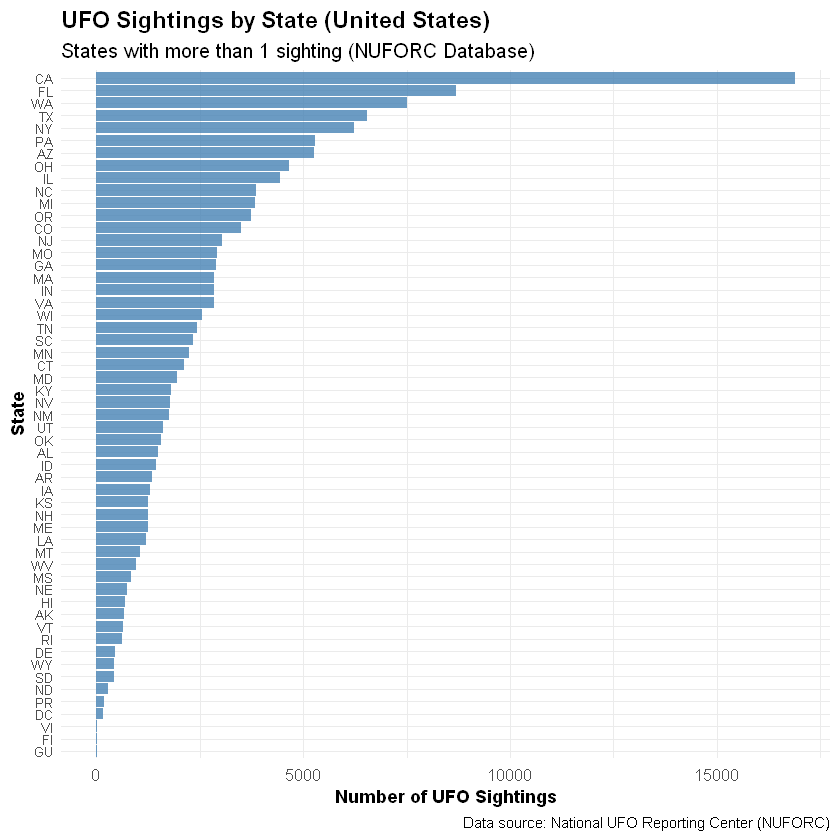


=== SUMMARY STATISTICS ===
Total UFO sightings in dataset: 156711 
US UFO sightings: 138588 
Percentage of sightings in US: 88.4 %
States/territories with sightings: 66 
States with >1 sighting: 55 
Range of sightings per state: 3 to 16904 
Median sightings per state: 1757 

=== QUESTION 8 COMPLETED ===
Plots created showing UFO sightings by state (US only, excluding states with only 1 sighting).
Files saved:


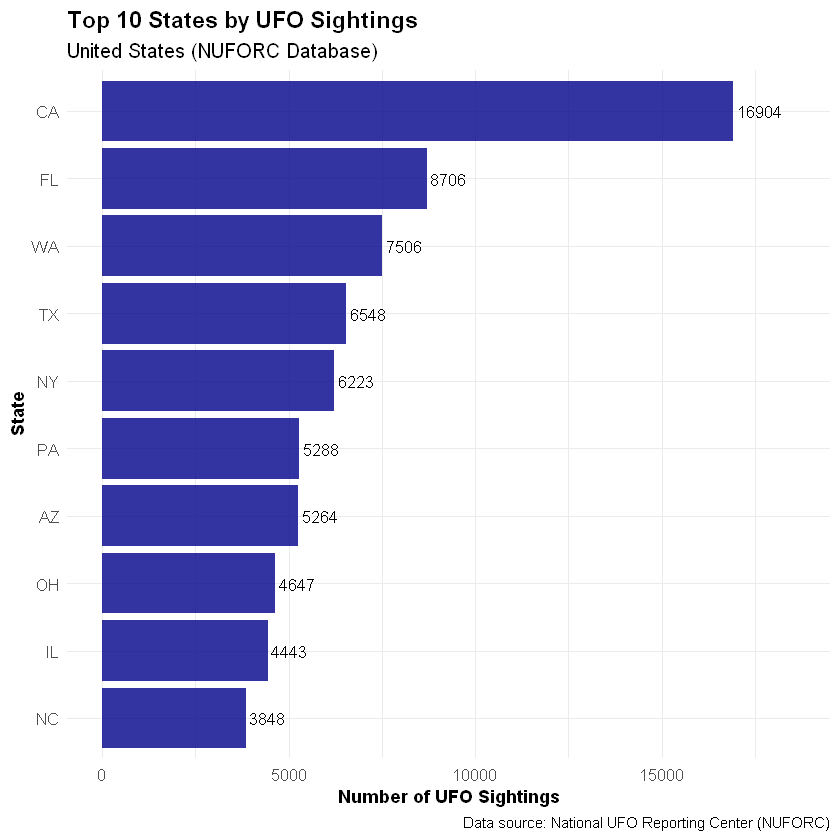

In [30]:
# BIOS512 Homework 4 - Question 8 FIXED Solution
# Plot UFO sightings by state (US only), filtering out states with only 1 observation

library(tidyverse)
library(ggplot2)

# Read the NUFORC UFO dataset
df <- read_csv("hw4-1/nuforc_sightings.csv", show_col_types = FALSE)

# Display basic information about the dataset
cat("Dataset dimensions:", nrow(df), "rows x", ncol(df), "columns\n")
cat("Column names:", paste(names(df), collapse = ", "), "\n")

# Check the data structure
cat("\n=== SAMPLE DATA ===\n")
print(head(df %>% select(city, state, country), 10))

# Filter for United States only
# The dataset already has separate city, state, country columns!
us_sightings <- df %>%
  filter(country == "USA") %>%
  filter(!is.na(state) & state != "" & state != "0" & state != "-") %>%
  # Clean up state names (remove extra spaces and standardize)
  mutate(state = str_trim(state))

cat("\n=== US SIGHTINGS SUMMARY ===\n")
cat("Total US sightings:", nrow(us_sightings), "\n")

# Count sightings by state
state_counts <- us_sightings %>%
  count(state, sort = TRUE, name = "sightings")

cat("Number of states/territories with sightings:", nrow(state_counts), "\n")

# Show all state counts (first 20 for readability)
cat("\n=== SIGHTINGS BY STATE (TOP 20) ===\n")
print(state_counts %>% slice_head(n = 20))

# Filter out states with only one observation (as required by the question)
states_filtered <- state_counts %>%
  filter(sightings > 1)

cat("\n=== STATES WITH MORE THAN 1 SIGHTING ===\n")
cat("Number of states after filtering:", nrow(states_filtered), "\n")
cat("States removed (only 1 sighting):", nrow(state_counts) - nrow(states_filtered), "\n")

# Show states that were filtered out
states_removed <- state_counts %>%
  filter(sightings == 1)
if (nrow(states_removed) > 0) {
  cat("\nStates with only 1 sighting (removed):\n")
  print(states_removed)
}

# Create the main plot - all states with >1 sighting
plot <- states_filtered %>%
  ggplot(aes(x = reorder(state, sightings), y = sightings)) +
  geom_col(fill = "steelblue", alpha = 0.8) +
  coord_flip() +
  labs(
    title = "UFO Sightings by State (United States)",
    subtitle = "States with more than 1 sighting (NUFORC Database)",
    x = "State",
    y = "Number of UFO Sightings",
    caption = "Data source: National UFO Reporting Center (NUFORC)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    plot.subtitle = element_text(size = 12),
    axis.text.y = element_text(size = 8),
    axis.text.x = element_text(size = 10),
    axis.title = element_text(size = 11, face = "bold")
  )

# Display the plot
print(plot)

# Save the plot
ggsave("/home/ubuntu/ufo_sightings_by_state_fixed.png", plot, width = 12, height = 10, dpi = 300)

# Additional analysis: Top 10 states
cat("\n=== TOP 10 STATES BY UFO SIGHTINGS ===\n")
top_10_states <- states_filtered %>%
  slice_head(n = 10)
print(top_10_states)

# Create a focused plot for top 10 states
top_10_plot <- top_10_states %>%
  ggplot(aes(x = reorder(state, sightings), y = sightings)) +
  geom_col(fill = "darkblue", alpha = 0.8) +
  geom_text(aes(label = sightings), hjust = -0.1, size = 3.5) +
  coord_flip() +
  labs(
    title = "Top 10 States by UFO Sightings",
    subtitle = "United States (NUFORC Database)",
    x = "State",
    y = "Number of UFO Sightings",
    caption = "Data source: National UFO Reporting Center (NUFORC)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    plot.subtitle = element_text(size = 12),
    axis.text = element_text(size = 10),
    axis.title = element_text(size = 11, face = "bold")
  ) +
  expand_limits(y = max(top_10_states$sightings) * 1.1)

print(top_10_plot)

# Save the top 10 plot
ggsave("/home/ubuntu/ufo_sightings_top10_states_fixed.png", top_10_plot, width = 10, height = 6, dpi = 300)

# Summary statistics
cat("\n=== SUMMARY STATISTICS ===\n")
cat("Total UFO sightings in dataset:", nrow(df), "\n")
cat("US UFO sightings:", nrow(us_sightings), "\n")
cat("Percentage of sightings in US:", round(100 * nrow(us_sightings) / nrow(df), 1), "%\n")
cat("States/territories with sightings:", nrow(state_counts), "\n")
cat("States with >1 sighting:", nrow(states_filtered), "\n")
cat("Range of sightings per state:", min(states_filtered$sightings), "to", max(states_filtered$sightings), "\n")
cat("Median sightings per state:", median(states_filtered$sightings), "\n")

cat("\n=== QUESTION 8 COMPLETED ===\n")
cat("Plots created showing UFO sightings by state (US only, excluding states with only 1 sighting).\n")
cat("Files saved:\n")

